In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from comparative_analysis import *
import builtins

comparative_analysis.py:13: VisibleDeprecationWarning: The star_analysis module has been deprecated. This code has been moved to the yt attic (https://bitbucket.org/yt_analysis/yt_attic) and will be removed in a future release.
  from yt.analysis_modules.star_analysis.api import StarFormationRate
/Users/dalek/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [2]:
ds = yt.load('/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2/RD0020/RD0020')
builtins.track_name = '/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2/halo_track'

yt : [INFO     ] 2017-12-08 14:35:20,398 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2017-12-08 14:35:20,399 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2017-12-08 14:35:20,400 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-12-08 14:35:20,401 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-12-08 14:35:20,403 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-12-08 14:35:20,404 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2017-12-08 14:35:20,404 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2017-12-08 14:35:20,405 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2017-12-08 14:35:20,406 Parameters: hubble_constant           = 0.695


In [7]:
initial_guess = initial_center_guess(ds,builtins.track_name)
halo_center = get_halo_center(ds,initial_guess)
rbL = highz_refine_box(ds,halo_center)
rbM,centerM = get_refine_box(ds,builtins.track_name)

In [7]:
print initial_guess
print halo_center
print centerM

[0.4930319996636576, 0.48806299767807343, 0.5021690004080219]
[0.49403095245361328, 0.48897266387939453, 0.50214862823486328]
[0.49403199966365763, 0.4889239987483652, 0.5021690004080219]


In [12]:
diff = [halo_center[0]-centerM[0],
       halo_center[1]-centerM[1],
       halo_center[2]-centerM[2]]
diff = ds.arr(diff,'code_length')

In [39]:
print np.sqrt(diff[0]**2.+diff[1]**2.0+diff[2]**2.0).in_units('kpc')

2.53081925118 kpc


yt : [INFO     ] 2017-12-04 15:44:35,082 xlim = 0.488139 0.489807
yt : [INFO     ] 2017-12-04 15:44:35,083 ylim = 0.501315 0.502983
yt : [INFO     ] 2017-12-04 15:44:35,085 xlim = 0.488139 0.489807
yt : [INFO     ] 2017-12-04 15:44:35,086 ylim = 0.501315 0.502983
yt : [INFO     ] 2017-12-04 15:44:35,088 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



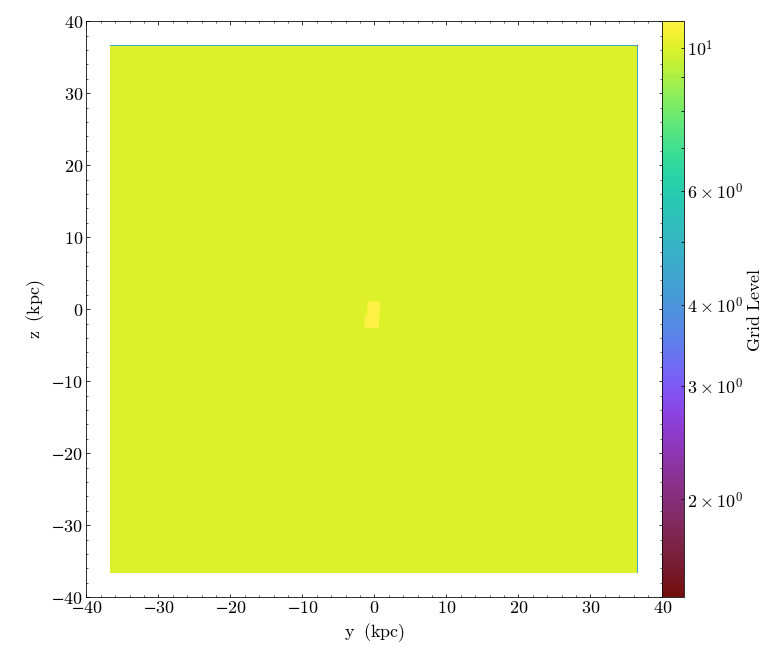

In [30]:
slL = yt.SlicePlot(ds,'x',('index','grid_level'),center=halo_center,width=(80.,'kpc'),data_source=rbL)
slL.show()

yt : [INFO     ] 2017-12-04 15:44:19,358 xlim = 0.487881 0.489966
yt : [INFO     ] 2017-12-04 15:44:19,359 ylim = 0.501127 0.503212
yt : [INFO     ] 2017-12-04 15:44:19,360 xlim = 0.487881 0.489966
yt : [INFO     ] 2017-12-04 15:44:19,362 ylim = 0.501127 0.503212
yt : [INFO     ] 2017-12-04 15:44:19,363 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



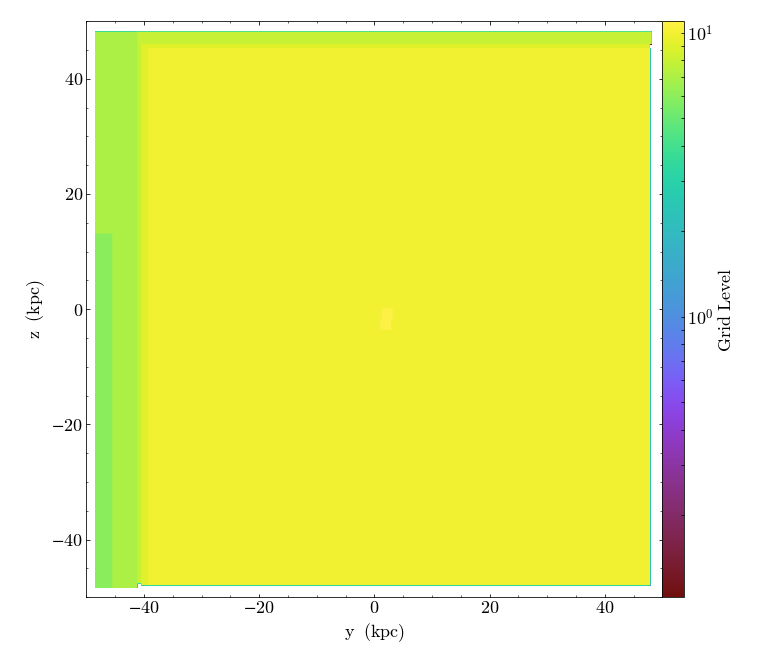

In [29]:
slL = yt.SlicePlot(ds,'x',('index','grid_level'),center=centerM,width=(100.,'kpc'),data_source=rbM)
slL.show()

In [31]:
print rbL['x'].max().in_units('kpc')-rbL['x'].min().in_units('kpc')
print rbL['y'].max().in_units('kpc')-rbL['y'].min().in_units('kpc')
print rbL['z'].max().in_units('kpc')-rbL['z'].min().in_units('kpc')

73.0006890794 kpc
73.0006890794 kpc
73.0006890794 kpc


In [32]:
print rbM['x'].max().in_units('kpc')-rbM['x'].min().in_units('kpc')
print rbM['y'].max().in_units('kpc')-rbM['y'].min().in_units('kpc')
print rbM['z'].max().in_units('kpc')-rbM['z'].min().in_units('kpc')

95.0472630996 kpc
95.5961404611 kpc
95.8705791418 kpc


In [34]:
print ds.arr(100.,'kpccm/h').in_units('kpc')*2

95.9232713685 kpc


In [36]:
print np.unique(rbL['dx'].in_units('pc'))
print np.unique(rbM['dx'].in_units('pc'))

[  91.47956025  182.9591205 ] pc
[   91.47956025   182.9591205    365.918241     731.836482    1463.672964
  2927.34592799] pc


In [37]:
print len(np.where(rbL['dx'].in_units('pc') <= 182.9591205)[0])/float(len(rbL['dx']))
print len(np.where(rbM['dx'].in_units('pc') <= 182.9591205)[0])/float(len(rbM['dx']))

1.0
0.995659587456


In [41]:
ds.current_redshift

1.9999996879495

In [3]:
#xL,yL,zL =  0.493032,0.487924,0.501169
#xR,yR,zR =  0.495032, 0.489924, 0.503169
#refine_box_center = ds.arr([0.5*(xL+xR), 0.5*(yL+yR), 0.5*(zL+zR)],'code_length')
#refine_box = ds.r[xL:xR, yL:yR, zL:zR]

xL,yL,zL = 0.493091, 0.488119, 0.501099
xR,yR,zR = 0.495091, 0.490119, 0.503099
refine_box_center = ds.arr([0.5*(xL+xR), 0.5*(yL+yR), 0.5*(zL+zR)],'code_length')
refine_box = ds.r[xL:xR, yL:yR, zL:zR]

In [8]:
print halo_center
print centerM
print refine_box_center

[0.49403095245361328, 0.48897266387939453, 0.50214862823486328]
[0.49403199966365763, 0.4889239987483652, 0.5021690004080219]
[ 0.494091  0.489119  0.502099] code_length


yt : [INFO     ] 2017-12-08 14:44:13,098 xlim = 0.487555 0.490683
yt : [INFO     ] 2017-12-08 14:44:13,099 ylim = 0.500535 0.503663
yt : [INFO     ] 2017-12-08 14:44:13,101 xlim = 0.487555 0.490683
yt : [INFO     ] 2017-12-08 14:44:13,102 ylim = 0.500535 0.503663
yt : [INFO     ] 2017-12-08 14:44:13,105 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



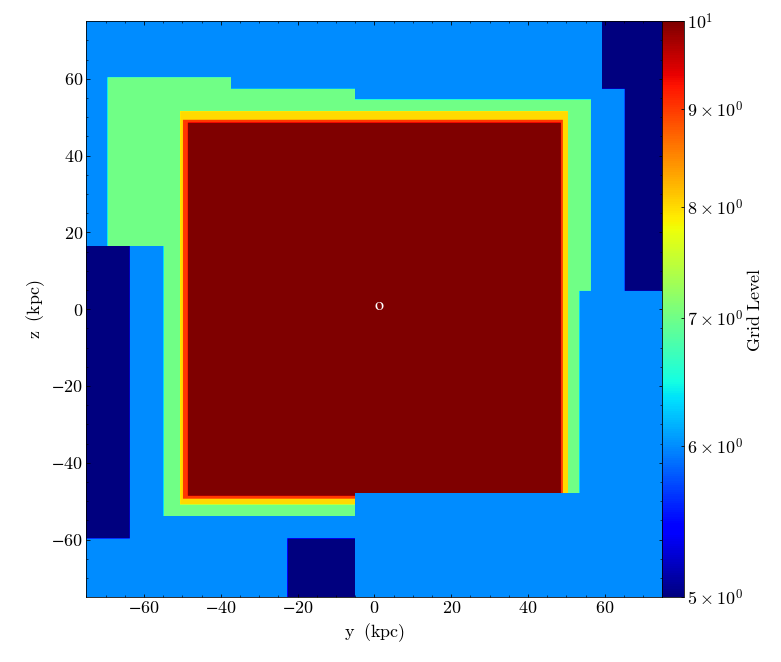

In [9]:
slR = yt.SlicePlot(ds,'x',('index','grid_level'),center=refine_box_center,width=(150.,'kpc'))
slR.annotate_text(refine_box_center,'o')
slR.set_cmap(('index','grid_level'),'jet')
slR.show()

In [55]:
dsNat = yt.load('/Users/dalek/data/Molly/natural/nref11/RD0020/RD0020')

yt : [INFO     ] 2017-12-04 16:05:33,191 Parameters: current_time              = 154.801187733
yt : [INFO     ] 2017-12-04 16:05:33,193 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2017-12-04 16:05:33,195 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-12-04 16:05:33,198 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-12-04 16:05:33,199 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-12-04 16:05:33,201 Parameters: current_redshift          = 1.99999762534
yt : [INFO     ] 2017-12-04 16:05:33,202 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2017-12-04 16:05:33,204 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2017-12-04 16:05:33,205 Parameters: hubble_constant           = 0.695


Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 28301.88it/s]
yt : [INFO     ] 2017-12-04 16:05:53,687 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2017-12-04 16:05:54,848 xlim = 0.487360 0.490488
yt : [INFO     ] 2017-12-04 16:05:54,849 ylim = 0.500605 0.503733
yt : [INFO     ] 2017-12-04 16:05:54,850 xlim = 0.487360 0.490488
yt : [INFO     ] 2017-12-04 16:05:54,851 ylim = 0.500605 0.503733
yt : [INFO     ] 2017-12-04 16:05:54,853 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



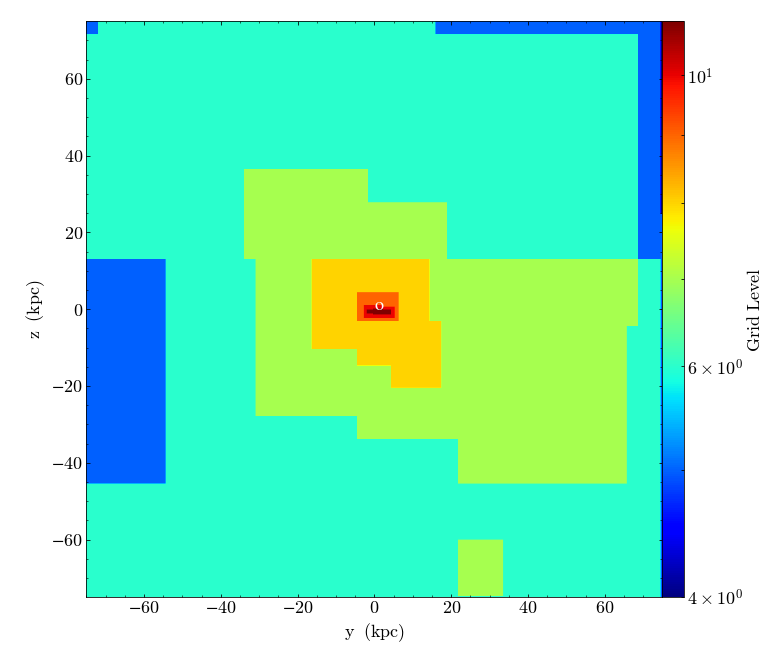

In [56]:
slNat = yt.SlicePlot(dsNat,'x',('index','grid_level'),center=refine_box_center,width=(150.,'kpc'))
slNat.annotate_text(refine_box_center,'o')
slNat.set_cmap(('index','grid_level'),'jet')
slNat.show()